# Fourier Transforms

This notebook works out some of the implementation details of Fourier transforms. 

It shows an example turning a set of superimposed sine waves into a spectral plot of Fourier coefficients, then an example of turning the Fourier coefficients back into a sine wave.

In [4]:
%matplotlib inline
from __future__ import division
from numpy import *
from matplotlib.pyplot import *
import seaborn as sns

Start by creating a function to generate a superimposed sine wave function:

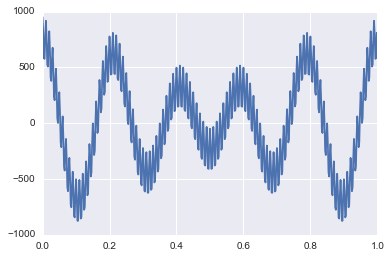

In [5]:
n = 500
k = np.arange(n)
t = k/n

def f(x):
    s1 = 250.0*cos( 4.0*2*pi*x)
    s2 = 500.0*cos( 5.0*2*pi*x)
    s3 = 200.0*cos( 100.0*2*pi*x)
    return s1+s2+s3

s = [f(t[i]) for i in range(n)]

plot(t,s)

Now take the Fourier transform of that:

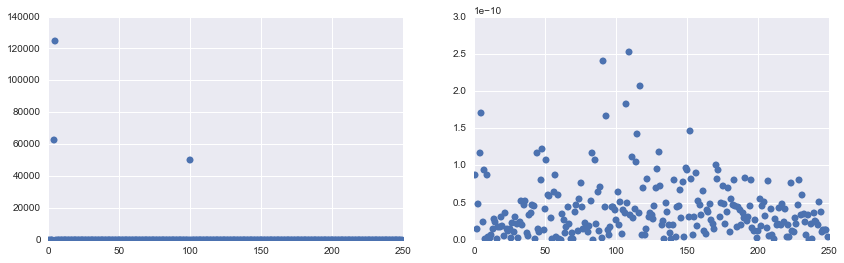

In [6]:
# Per numpy documentation,
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft
# element 0 is the sum of the signal peaks
# elements 1:(len/2) is the positive side
# element (len/2)+1:-1 is the negative size

freq = np.fft.fftfreq(t.shape[0])
freq = freq[1:int(n/2)]
Y = np.fft.fft(s)
Yplt = Y[1:int(n/2)]

fig = figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(freq*n,abs(Yplt.real),'o')
ax2.plot(freq*n,abs(Yplt.imag),'o')

The three outlying points are the three sine waves. The first has the smallest amplitude and the lowest frequency. That's the first point that appears on the left. The second point, above that, is the second sine wave, with a slightly higher frequency, and double the amplitude. The last point is the high-frequency point that has an amplitude slightly less than the first sine wave.

Now turn these Fourier coefficients back into a sine wave using the inverse Fourier transform.

Remember, we threw away the complex and negative portions, but we can still reconstruct those.

500
500


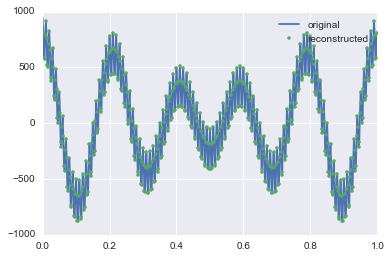

In [8]:
newY = Y
newY = np.array(newY)
newy = np.fft.ifft(newY)

print len(newY)
print len(newy)

plot(t, s,'-',label="original")
plot(t[1:],newy[1:],'.',label="reconstructed")
legend()
